# Demo - Kubernetes Service Deployment

## Building the container images

#### Use `docker login` to setup your credentials

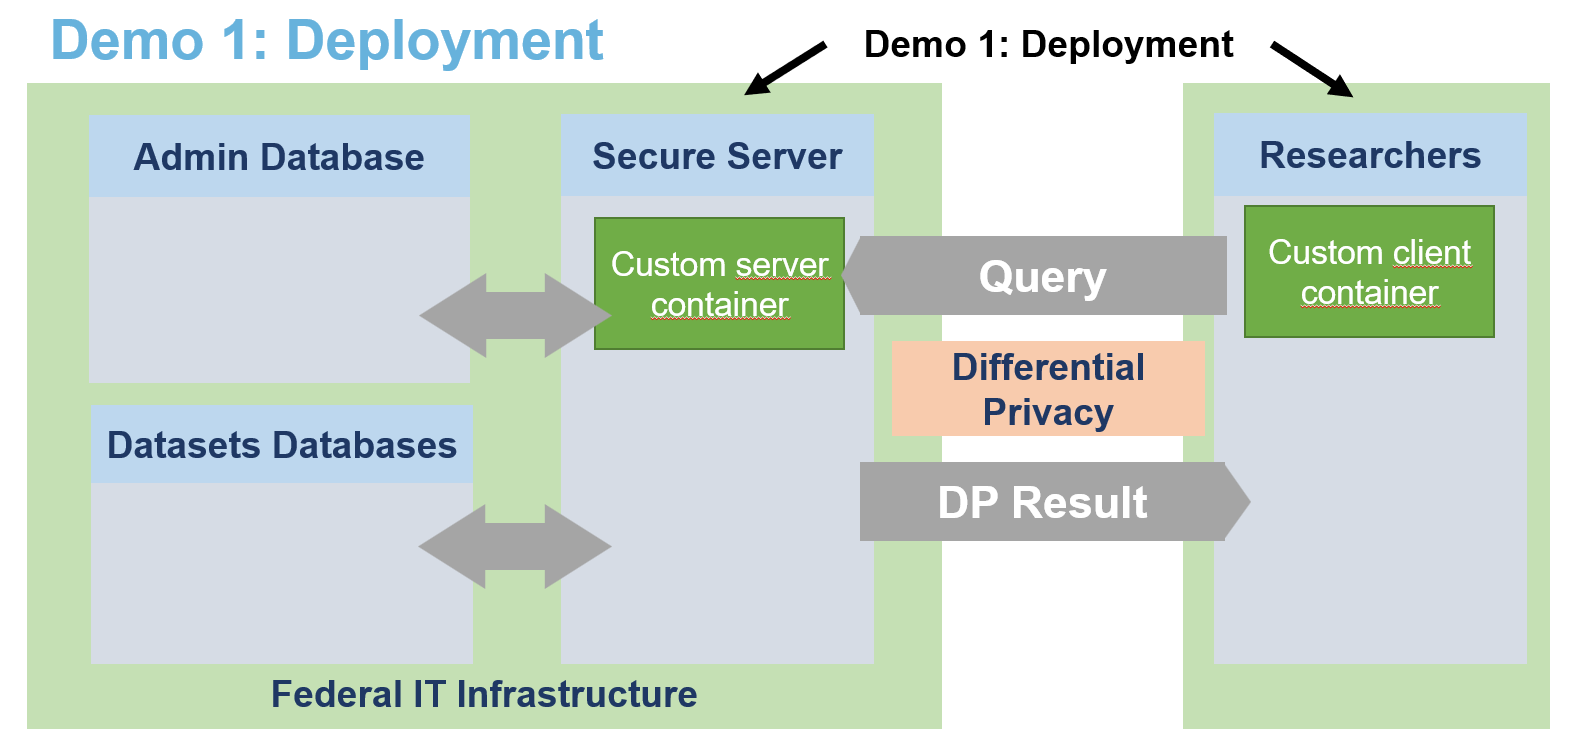

In [1]:
from IPython.display import Image
Image(filename="images/image_demo_deployment_containers.png", width=800)

### Server

In [ ]:
!cd .. && docker build --target sdd_server_prod -t <your_registry>/sdd_server_prod:latest .
!cd .. && docker push <your_registry>/sdd_server_prod:latest

### Client

In [ ]:
!cd ../../client/ && docker build --target sdd_client_prod -t <your_registry>/sdd_client_prod:latest .
!cd ../../client/ && docker push <your_registry>/sdd_client_prod:latest

## Starting the service

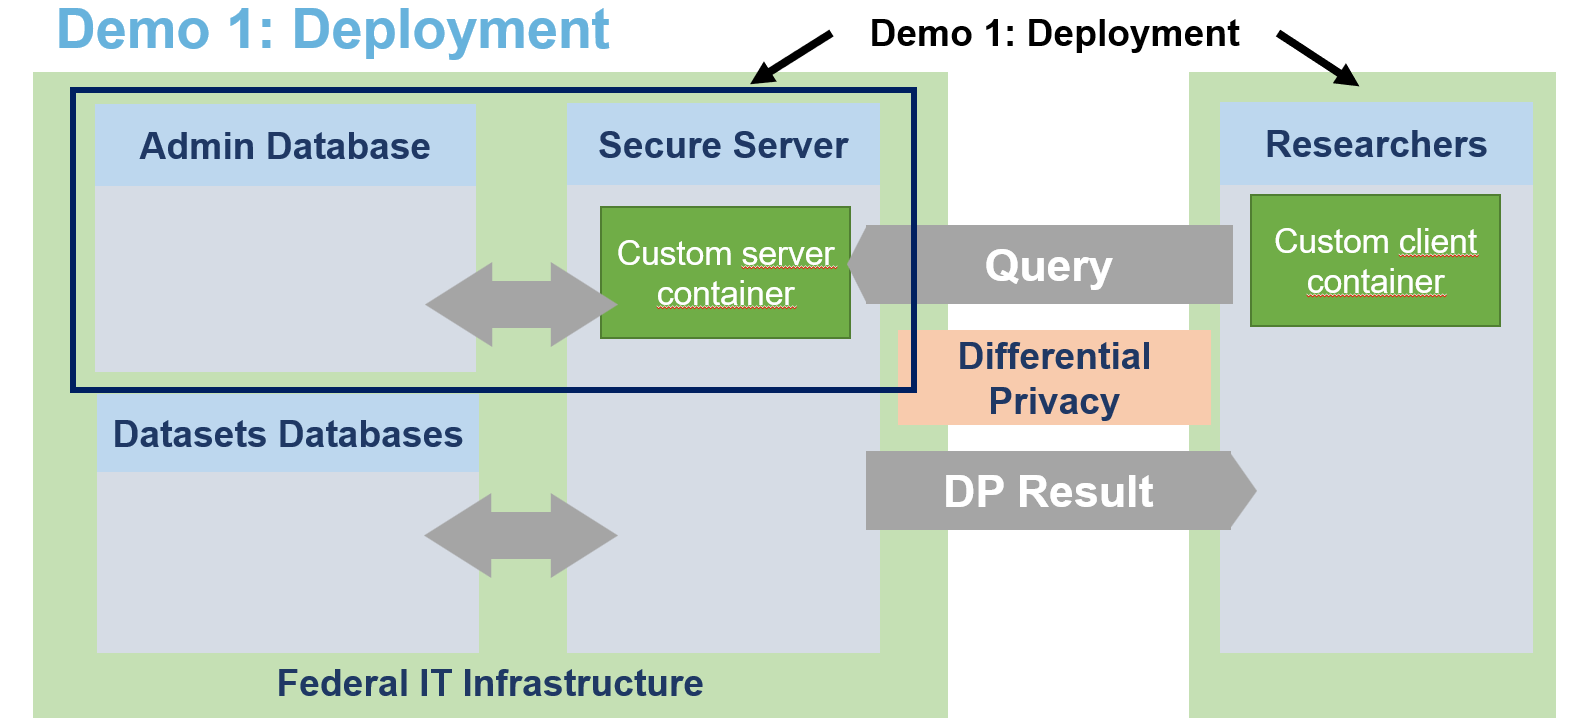

In [2]:
from IPython.display import Image
Image(filename="images/image_demo_deployment_service.png", width=800)

In [3]:
import os
os.chdir('../deploy/helm/charts/sdd_server')


#### Update `values.yaml` file

#### Download Helm dependency for the MongoDB chart

In [91]:
!helm dependency update

Saving 1 charts
Pulled: registry-1.docker.io/bitnamicharts/mongodb:13.18.1
Digest: sha256:f3b2a691537260044746bc4a8898e9ae68e8c29864639737b6da920f99aebe97
Deleting outdated charts


#### Install server chart

In [92]:
!helm install -f values.yaml sdd-service .

W0918 07:49:26.628394  768420 warnings.go:70] annotation "kubernetes.io/ingress.class" is deprecated, please use 'spec.ingressClassName' instead
NAME: sdd-service
LAST DEPLOYED: Mon Sep 18 07:49:24 2023
NAMESPACE: user-paulineml
STATUS: deployed
REVISION: 1
TEST SUITE: None
NOTES:
1. Get the application URL by running these commands:
  https://sdd-demo.lab.sspcloud.fr/


#### Check deployment with `kubectl get all` and by querying `<server_url>/state`

## Starting the client session



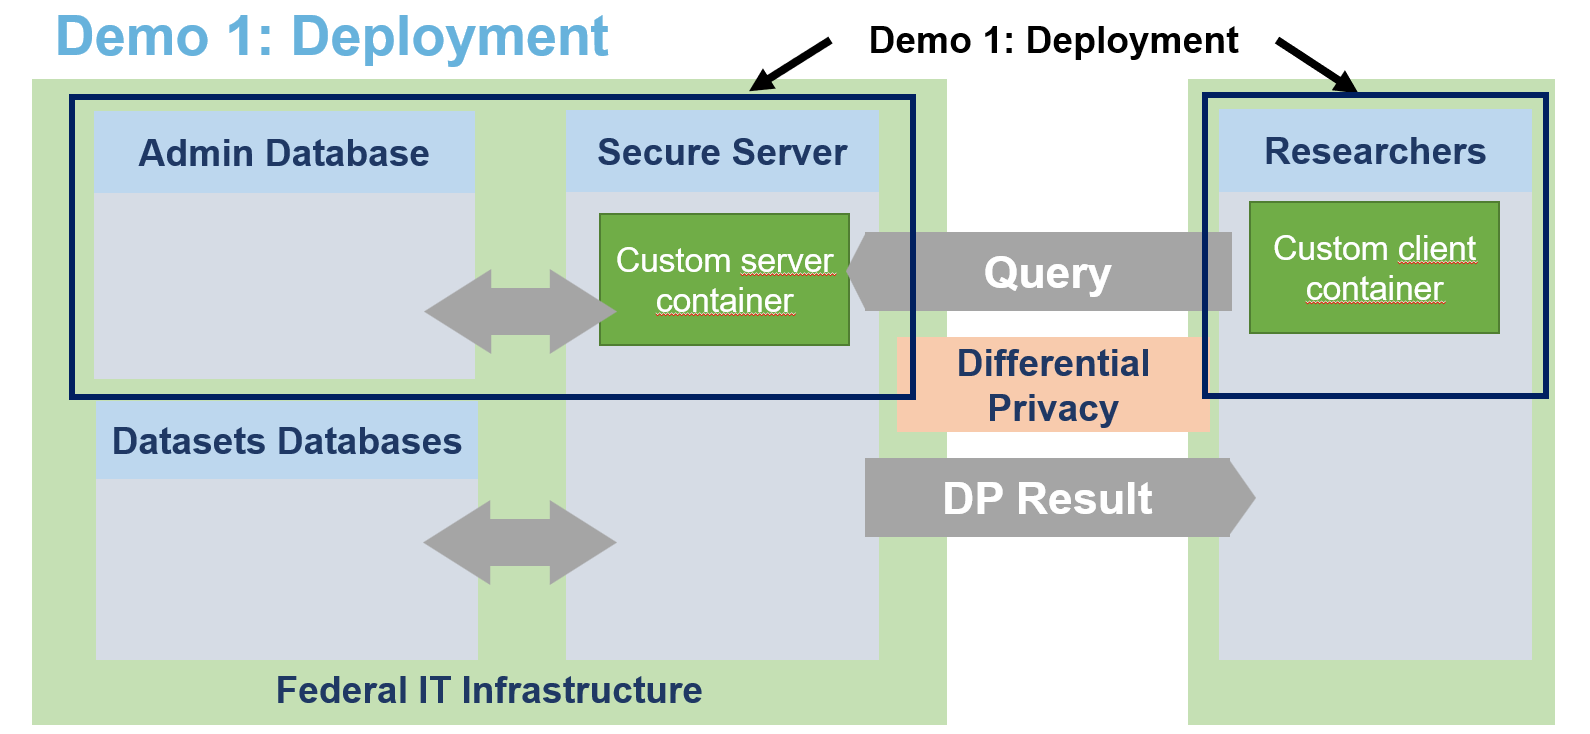

In [4]:
os.chdir("../../../../notebooks/")
from IPython.display import Image
Image(filename="images/image_demo_deployment_client.png", width=800)

In [6]:
os.chdir("../../client/deploy/helm/charts/sdd_client")

#### Update `values.yaml` file

#### Install the client chart

In [ ]:
!helm install -f values.yaml sdd-client .

#### Access the client environment through the url and use the password defined in the values file.

## Stopping the service

In [ ]:
!helm uninstall sdd-service
!helm uninstall sdd-client